# Project 1 - Unsupervised Learning Classification
## Due: July 15$^{th}$ 11:59 PM

In this project, we are going to build classifiers to classify unlabeled datasets. While we do not implement machiine learning algorithms but apply built-in algorithms from `sklearn`, you are going to develop models. 
 
- Data Sets: `CS559_Summer21_Project1_01.csv` and `CS559_Summer21_Project1_02.csv`
- Data Information: Unlabeled Data - onlly target variable, `Class`, is known. 
- Rules: You must not use any other libraries than are provided below. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### For each data set: 
- Modelings: You are going to build four different classifiers using unsupervised learning techniques (*clustering, dimention reduction*) and supervised learning techniques (*KNN, LDA, Logistic Regression, Gaussian Process, and SVM*). The models can be either a single or a mix of any algorithms (e.g., Unsupervised Learning+Unsupervised Learning, Unsupervised Learning + Supervised Learning, Supervised Learning + Supervised Learning). Despite the freedome of modeling, you must explain your work and justify your workflow. 
- Final Models: You can develop many models you want and you only need to report the best accuracies of models in the following conditions. 
    1. Unsupervised Learning Classifier
    2. Non-parametric Supervised Learning Classifier (KNN, Linear SVM) 
    3. Probabilitic Supervised Learning Classifier (Logistic Regression)
    4. Supervised Learning Classifier with Kernal (Kernal SVM)
    
- Accuracy Report: The accuracy is the average of train and test accuracy. The accuracy must be reported in Data Frame format as an example shown below. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 2 | 35%|
| 1 | Unsupervised Learning Classifier | -- | -- |
| 2 | Non-parametric Supervised Learning Classifier | -- | -- |
| 3 | Probabilitic Supervised Learning Classifier | -- | -- |
| 4 | Supervised Learning Classifier with Kernal | -- | -- |
- The average accuracy of simple logistic regression without feature engineering is 35%. 
### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |

- Please have visualizations to support your explanations. 

### Submission:
- Submit the notebook and its exported HTML files. 
- Considering the working period of this project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split

In [2]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

Using plot_model from lecture 6 (with minor adjustments) helps to create a consistent graphing that can be used across various models down below. Using the same structure for each graph allows for easier comparisons and equal representations.

In [3]:
# From Lecture 6
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [2], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c = 'red',
                    s=5, alpha=0.33, edgecolors='k')

### Project 1 Starts from here: `CS559_Summer21_Project1_01.csv`

#### Model 1: Unsupervised Learning Classifier
- Classify using clustering method before and after feature engineering and dimension reduction. 
- Explain the feature enginnering process and the improvement of result when it was done. 
- Explain the role of dimension reduction to the result improvement.  
- Explain the ways to improve the unsupervised learning classifier. 

Reading in and Cleaning Data:

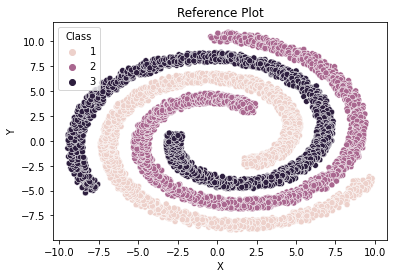

In [4]:
data1 = pd.read_csv('CS559_Summer21_Project1_01.csv', header= None, encoding='ISO-8859-1')
data1.columns = ["Index","X","Y","Class"]
# use all but the garbage first column of ['NaN', 'var2', 'var2.1', 'Class']
x=data1[1:].to_numpy()
x[:,0] = x[:,0].astype(int)
x[:,1] = x[:,1].astype(float)
x[:,2] = x[:,2].astype(float)
x[:,3] = x[:,3].astype(int)
# Change data from string values to something I can work with

# Reference Plot
df = pd.DataFrame(x)
df.columns = ["Index","X","Y","Class"]
plt.title("Reference Plot")
plot_2D(df,df["X"],df["Y"],df["Class"])

(array([[ 383.,  593.,  908., 1061.,  823.,  903., 1172.,  892.,  628.,
          137.],
        [ 351.,  669.,  969., 1008.,  942.,  729., 1171.,  891.,  576.,
          194.]]),
 array([-9.45515199546676, -7.416621963655484, -5.378091931844208,
        -3.3395619000329324, -1.3010318682216564, 0.7374981635896205,
        2.7760281954008956, 4.814558227212171, 6.853088259023448,
        8.891618290834725, 10.930148322646], dtype=object),
 <a list of 2 BarContainer objects>)

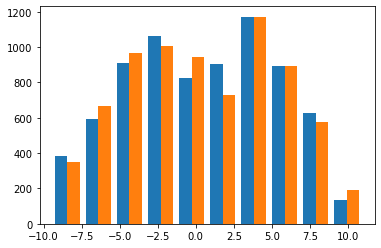

In [5]:
# Distribution of values in X and Y columns depicts healthy range and distribution 
# without any absurd outliers or otherwise bad data
plt.hist(x[:,1:3])

KMeans Clustering Method:

Clean up and fit our data

In [6]:
# KMeans

# define our dataset to be used in KMeans
kData = pd.DataFrame(x)
kData.columns = ["Index","X","Y","Class"]

# Format the actual data into a usable array
X = np.array(list(zip(kData["X"],kData["Y"])))

# Cluster using k=3 as there are three classes in the reference plot. This will provide the best accuracy.
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
# Redefine our data's classes to match the result we got from clustering
kData["Class"]=kmeans.labels_

Plot our data as we have clustered it, no Feature Engineering or Dimension Reduction yet.

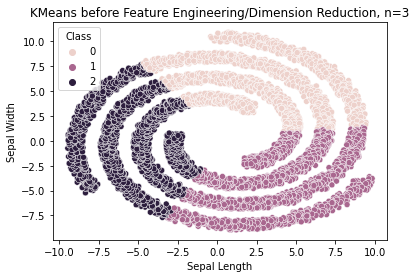

In [7]:
plot_2D(kmeans, X[:,0], X[:,1], kData["Class"])
plt.title('KMeans before Feature Engineering/Dimension Reduction, n=3')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [8]:
# Accuracy
predictions = kmeans.predict(X)
correct = 0
test = np.array(list(x[:,3]))

#shift from [1,2,3] to [0,1,2] to match predictions' range
test = test - 1

cm = confusion_matrix(test, predictions)
for i in range(len(cm)):
    correct += cm[i][i]
kmeansAccuracy = correct/75
print(kmeansAccuracy)
print(cm)

33.32
[[763 977 760]
 [980 769 751]
 [769 764 967]]


Feature Engineering/Dimension Reduction:

In [9]:
# define our dataset to be used in KMeans
kData = pd.DataFrame(x)
kData.columns = ["Index","X","Y","Class"]

# Create a set of transformations to try and separate the different classes
kData["XY"] = kData["X"]*kData["Y"] #X*Y
kData["R"] = np.sqrt((kData["X"]**2 + kData["Y"]**2).astype(float)) #R = sqrt(X^2 + Y^2)
kData["theta"] = np.arctan((kData["Y"]/kData["X"]).astype(float))
kData["Rtheta"] = kData["R"]**2+kData["theta"]**2+kData["R"]*kData["theta"]*np.sqrt(2)
kData = kData.sort_values(["R","theta"])


kData = kData[1:]

# Best combination I could find
X = np.array(list(zip(
                      kData["XY"],
                      kData["R"], 
                      kData["theta"]
                      )))
# XY R THETA got 63 percent!!!

    Explain the feature enginnering process and the improvement of result when it was done.
Using a variety of transformations from the original X and Y values allowed me to transform the data into a format that could be better clustered using the KMeans clustering algorithm. I created several features shown above and used them in combination with one another to segment the classes in 3D. Overall, this along with the use of PCA improved the classification accuracy from 33.32% to 63.25%, a near double in accuracy, though still not perfect.

    Explain the role of dimension reduction to the result improvement.
Dimension reduction was used to optimize the dimension space, to reduce complexity, and to train the model more quickly. Using PCA in combination with feature engineering allowed me to experiment with more features and still be able to funnel them back down to an interprettable and plottable dimension space.

    Explain the ways to improve the unsupervised learning classifier.
KMeans particularly is not a very suitable classifier for this dataset, as this data is not based on global proximity. Since KMeans creates centroids and clusters the entire dataset based on which centroid the datapoint is closest to, it tends to create global divisions that is not suitable for a dataset like this, where local proximity is greatly preferred. The usage of feature engineering could be optimized as I did not perfectly separate the different classes, but other algorithms more based on local proximity could be used as well to perform the task more effectively and efficiently.

In [10]:
# In terms of feature engineering, there are not missing or outlandish values to impute or adjust. 

# Use PCA to optimize dimensions
pca = PCA(n_components=3,random_state=0)
X = pca.fit_transform(X)

# Scale everything
sc = StandardScaler()
X = sc.fit_transform(X)

# Recluster the transformed data with three clusters still
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
kData["Class"]=kmeans.labels_
# kData[kData["Class"] == 0] = 5
# kData[kData["Class"] == 1] = 0
# kData[kData["Class"] == 5] = 1

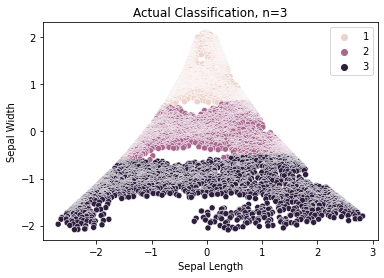

In [11]:
test = np.array(list(x[1:,3]))

plot_2D(kmeans,X[:,0], X[:,1], test)
plt.title('Actual Classification, n=3')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [12]:
# Accuracy
predictions = kmeans.predict(X)
correct = 0
test = np.array(list(x[1:,3]))

#shift from [1,2,3] to [0,1,2] to match predictions' range
test = test - 1
cm = confusion_matrix(test, predictions)
for i in range(len(cm)):
    correct += cm[i][i]
kmeansAccuracy = correct/75
print(kmeansAccuracy)
print(cm)

plt.title('Predicted Classification, n=3')
plot_2D(kmeans,X[:,0], X[:,1], predictions)

63.25333333333333
[[2499    0    0]
 [ 942  985  573]
 [   0 1240 1260]]


#### Model 2: Non-parametric Supervised Learning Classifier
- Use both KNN and linear SVM with a raw dataset (no feature engineering). 
- For KNN, determine the limit of K value by testing various K value. Justify the threshold K value. 
- For linear SVM, explain the failure of using linear SVM. 

In [13]:
#KNN

# Follow similar format to how we defined kData
knnData = pd.DataFrame(x)
knnData.columns = ["Index","X","Y","Class"]

# Add in y value for our target
X = list(zip(knnData["X"],knnData["Y"]))
y = list(knnData["Class"])

# Scale everything as required by KNN algorithm
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
# Create a list of values showing the accuracy rate for varying k values
kList =[]
for i in range(1,7500,250):
    # Create my classifier based on i nearest neighbors, and fit it to my X and y
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X,y)

    # Gather my class predictions based on my X data
    y_predictions = neigh.predict(X)
    
    # Create a confusion rate to show the values correct along the major diagonal, and where data was incorrectly classified
    cm = confusion_matrix(y, y_predictions)
    correct = 0
    # Major diagonal = correctly classified, so sum up the major diagonal
    for i in range(3):
        correct += cm[i][i]
    # and append the sum to the list
    kList.append(correct)

[[   1 7500]
 [ 251 7421]
 [ 501 7106]
 [ 751 6172]
 [1001 4673]
 [1251 3186]
 [1501 2548]
 [1751 2849]
 [2001 2797]
 [2251 2618]
 [2501 2451]
 [2751 2297]
 [3001 1975]
 [3251 2040]
 [3501 2432]
 [3751 2802]
 [4001 3000]
 [4251 2678]
 [4501 2744]
 [4751 2951]
 [5001 2222]
 [5251 2176]
 [5501 2165]
 [5751 2241]
 [6001 2427]
 [6251 2623]
 [6501 2814]
 [6751 3029]
 [7001 3071]
 [7251 2961]]


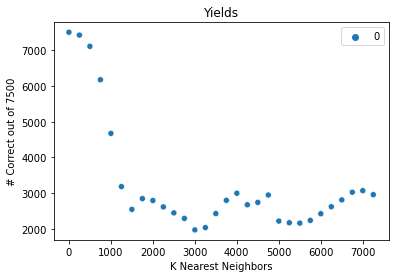

In [15]:
# Show kList next to its corresponding k values
yields = np.array(list(zip(range(1,7500,250),kList)))
print(yields)

# And plot the resulting graph
df = pd.DataFrame(yields)
df.columns = ["K Nearest Neighbors","# Correct out of 7500"]
plt.title("Yields")
plot_2D(df,"K Nearest Neighbors","# Correct out of 7500",0)
#limit k that keeps a perfect record check 1 - 250 for more accurate threshold

As shown by the graph above, the accuracy rate severly decreases quickly as the K Nearest Neighbors used to classify grows. This is because the reference plot shows a distinct favoritism towards local view clustering. There are 3 distinct spiraling stripes and each one is a different class. For low k values, this is perfect as it checks the nearest few values, which will all be within the same stripe, and thus correctly classify each data point. As k grows into the thousands and onwards, the field of view of each data point being classified grows larger and starts reading from other stripes. Since the stripes are very close together, the distance along the length of one stripe will be much greater than the distance between stripes, and so spilling of classifications start to occur between stripes, as will be seen below. As each data point takes a more global view of the whole dataset, the graph starts to resemble KMeans clustering, specifically at a k-value of 7000, where the data is classified by nearly the whole dataset. When each point is classified by the entire dataset, the largest initial class will dominate the whole graph as it will always be the majority, regardless of proximity, as shown with knn = 7500. 

In [16]:
# Create a list of values showing the accuracy rate for varying k values
kList2 =[]
for i in range(125,135,1):
    # Create my classifier based on i nearest neighbors, and fit it to my X and y
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X,y)

    # Gather my class predictions based on my X data
    y_predictions = neigh.predict(X)
    
    # Create a confusion rate to show the values correct along the major diagonal, and where data was incorrectly classified
    cm = confusion_matrix(y, y_predictions)
    correct = 0
    # Major diagonal = correctly classified, so sum up the major diagonal
    for i in range(3):
        correct += cm[i][i]
    # and append the sum to the list
    kList2.append(correct)

[[ 125 7500]
 [ 126 7500]
 [ 127 7500]
 [ 128 7500]
 [ 129 7499]
 [ 130 7499]
 [ 131 7498]
 [ 132 7498]
 [ 133 7498]
 [ 134 7498]]


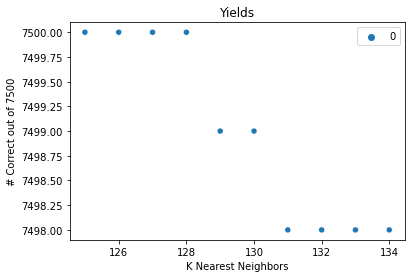

In [17]:
# Show kList next to its corresponding k values
yields = np.array(list(zip(range(125,135,1),kList2)))
print(yields)

# And plot the resulting graph
df = pd.DataFrame(yields)
df.columns = ["K Nearest Neighbors","# Correct out of 7500"]
plt.title("Yields")
plot_2D(df,"K Nearest Neighbors","# Correct out of 7500",0)
#limit k that keeps a perfect record check 1 - 250 for more accurate threshold

As shown above, the exact threshold k-value for perfect classification using KNN is with a k-value of 128. For values greater than this, the observed number correct out of 7500 drops steadily 

100.0


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


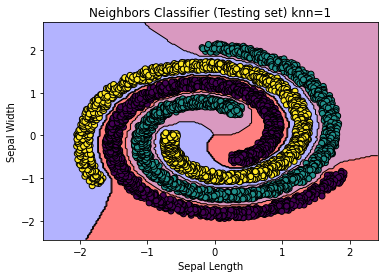

<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


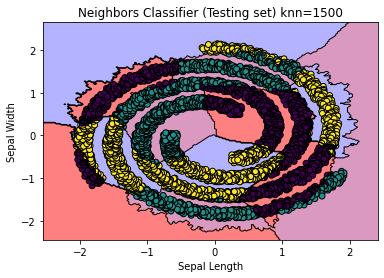

<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


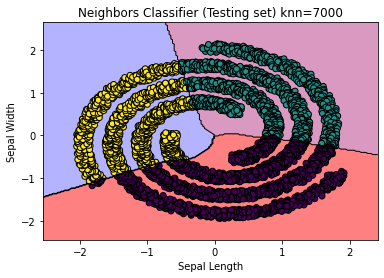

<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
<ipython-input-3-bc893237f863>:33: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [2], linewidths=1., colors='k')


In [18]:
# Plot varying knns, copy and pasted with different n_neighbor values
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

#Grab the accuracy of the best one, which happens to be 100% accuracy
knnAccuracy = neigh.score(X,y)*100
print(knnAccuracy)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=1')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=1000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=1000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


neigh = KNeighborsClassifier(n_neighbors=1500)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=1500')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=3000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=3000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=7000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=7000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=7500)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plot_model(neigh, X[:,0], X[:,1], y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=7500')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [19]:
# Linear SVM

# Setup is similar to previous models, a lot of time was spent making these models consistently formatted and readable
svmData = pd.DataFrame(x)
svmData.columns = ["Index","X","Y","Class"]

X = np.array(list(zip(svmData["X"],svmData["Y"])))
y = list(svmData["Class"])

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# And doing standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# SVC with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

# Gather the training and testing accuracies
# accuracy of the training (tells how well the modeling is done) 
# and the testing accuracy (implies the applicability and robustness)

svmTrainAccuracy = svm_model.score(X_train, y_train)*100 # accuracy
print("svm training accuracy:", svmTrainAccuracy)
svmTestAccuracy = svm_model.score(X_test, y_test)*100 # accuracy
print("svm testing accuracy:",svmTestAccuracy)

y_predictions = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_predictions)
print(cm)

svm training accuracy: 34.684444444444445
svm testing accuracy: 33.973333333333336
[[216 234 172]
 [181 222 219]
 [232 200 199]]


In [22]:
plot_model(svm_model, X_test[:,0], X_test[:,1], y_predictions)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


    For linear SVM, explain the failure of using linear SVM.

As shown by the plot above, linear SVM is only capable of dividing the distributions based on the line that most significantly divides them. However, due to the spiraling nature of the data, all 3 of the classes overlap no matter the slope of the lines used to divide them. This plot above is contrasted with the plot below to show (behind the red support vectors) that at every angle of rotation, all three classes are stacked on top of each other and evenly distributed across their respective curved stripe. Thus it is impossible to successfully or even semi-successfully divide them using this method. 

This is also evident from the svm training and testing accuracies as both show marginal improvements over a 1/3 accuracy, which would be the average accuracy from guessing at random.

<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


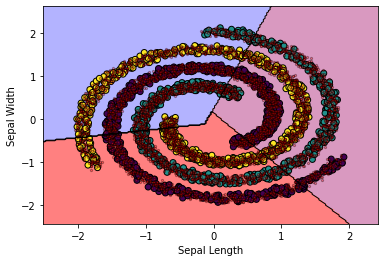

In [23]:
plot_model(svm_model, X_test[:,0], X_test[:,1], y_test)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Model 3: Probabilitic Supervised Learning Classifier
- Simple logistic regression is already done and resulted the accruacy value of 35%. 
- Improve the model and explain the workflow. 

In [24]:
#The 35% accuracy is the result of logistic regression used without any feature engineering or dimension reduction. 
#For model 3, you can do such work to improve the classification using logistic regression.

# Logistic Regression
# Similar formatting of data
lrData = pd.DataFrame(x)
lrData.columns = ["Index","X","Y","Class"]

# Create a vast set of transformations in an effort to better segment the classes
lrData["X2"] = lrData["X"]**2 #X^2
lrData["XY"] = lrData["X"]*lrData["Y"] #X*Y
lrData["2XY"] = (2**(1/2))*lrData["X"]*lrData["Y"] #sqrt(2)*X*Y
lrData["Y2"] = lrData["Y"]**2 #Y^2
lrData["X2Y2XY"] = lrData["X2"]+lrData["Y2"]+lrData["XY"]
lrData["R"] = np.sqrt((lrData["X"]**2 + lrData["Y"]**2).astype(float)) #R = sqrt(X^2 + Y^2)
lrData["theta"] = np.arctan((lrData["Y"]/lrData["X"]).astype(float))
lrData["Rtheta"] = lrData["R"]**2+lrData["theta"]**2+lrData["R"]*lrData["theta"]*np.sqrt(2)
lrData["Xdif"] = lrData["X"].diff()
lrData["Ydif"] = lrData["Y"].diff()
lrData["Rdif"] = lrData["R"].diff()
lrData["thetadif"] = lrData["theta"].diff()
lrData = lrData[1:]


# Organize and format the data into an array
X = np.array(list(zip(lrData["X"], 
                      lrData["Y"], 
                      lrData["X2"],
                      lrData["XY"],
                      lrData["2XY"],
                      lrData["Y2"],
                      lrData["X2Y2XY"], 
                      lrData["R"], 
                      lrData["theta"],
                      lrData["Rtheta"],
                      lrData["Xdif"], 
                      lrData["Ydif"], 
                      lrData["Rdif"], 
                      lrData["thetadif"]
                      )))

y = list(lrData["Class"])


In [25]:
# Use PCA to reduce dimensions from 14 to 12, still a lot of features but reduces complexity while maintaining accuracy
pca = PCA(n_components=12,random_state=0)
X = pca.fit_transform(X)

In [26]:
# Standard train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scale the features to ensure they are of the same magnitudes
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Fitting the data
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

# Predicting classes of test data
y_predictions = lr.predict(X_test)

# Getting training and testing accuracies
lrTrainAccuracy = lr.score(X_train, y_train)*100 # accuracy
print("lr training accuracy:", lrTrainAccuracy)
lrTestAccuracy = lr.score(X_test, y_test)*100 # accuracy
print("lr testing accuracy:", lrTestAccuracy)

# Printing confusion matrix
cm = confusion_matrix(y_test, y_predictions)
print(cm)

lr training accuracy: 51.86699857752489
lr testing accuracy: 51.306666666666665
[[411 163  48]
 [219 241 162]
 [ 90 231 310]]


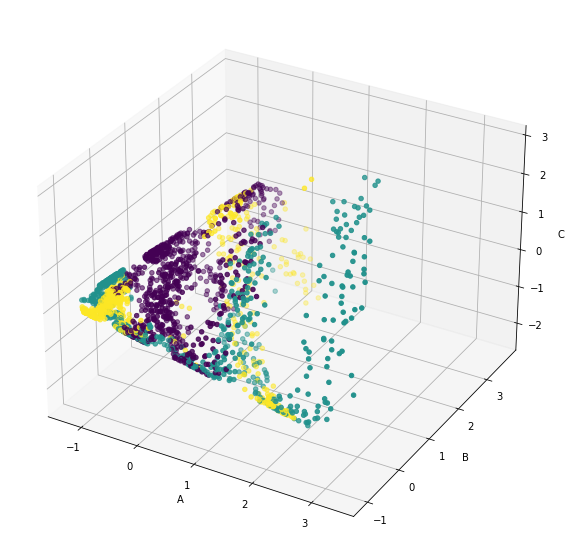

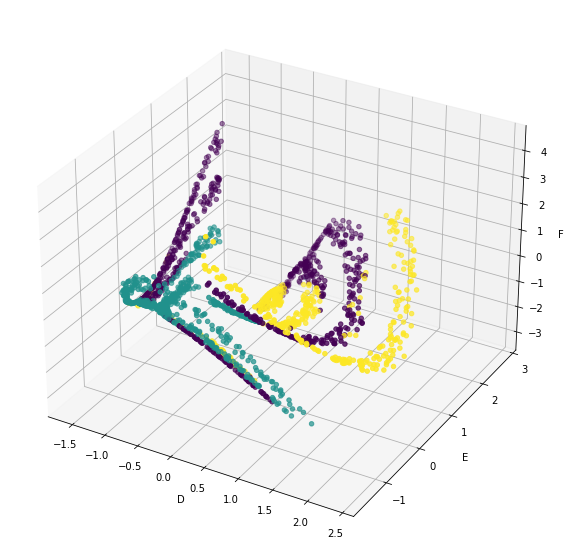

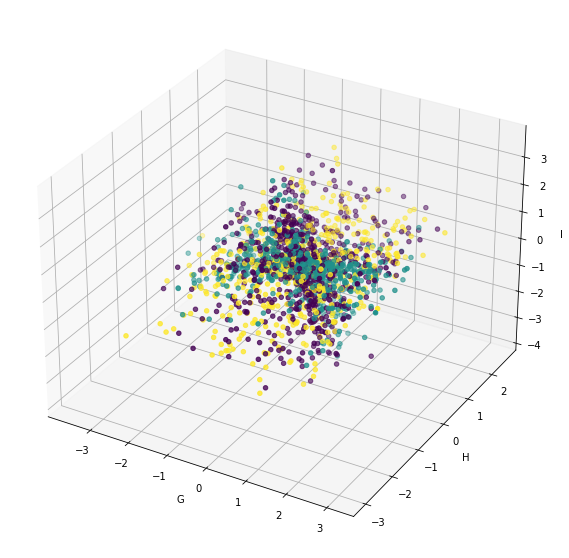

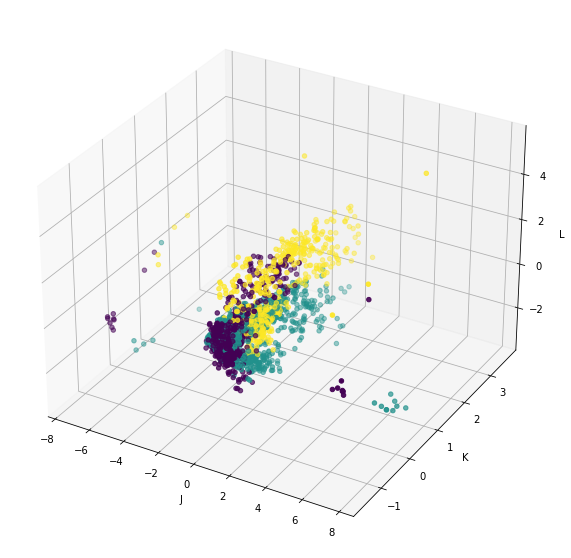

In [28]:
# Plot the data
lrdf = pd.DataFrame(X_test)
lrdf.columns = ["A","B","C","D","E","F","G","H","I","J","K","L"]
lrdf["O"] = y_predictions
lrdf["P"] = y_test

# Predicted Classes
plot_3D(lrdf, "A", "B", "C", "O")
plot_3D(lrdf, "D", "E", "F", "O")
plot_3D(lrdf, "G", "H", "I", "O")
plot_3D(lrdf, "J", "K", "L", "O")


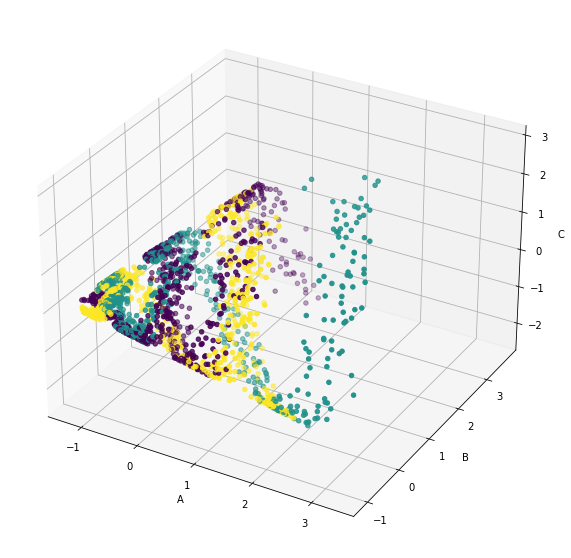

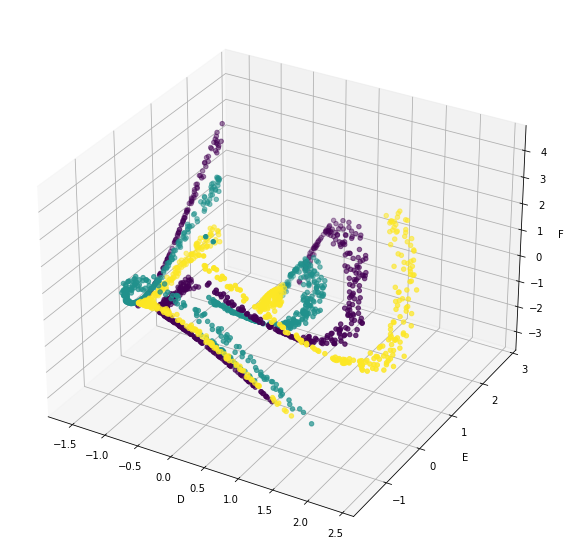

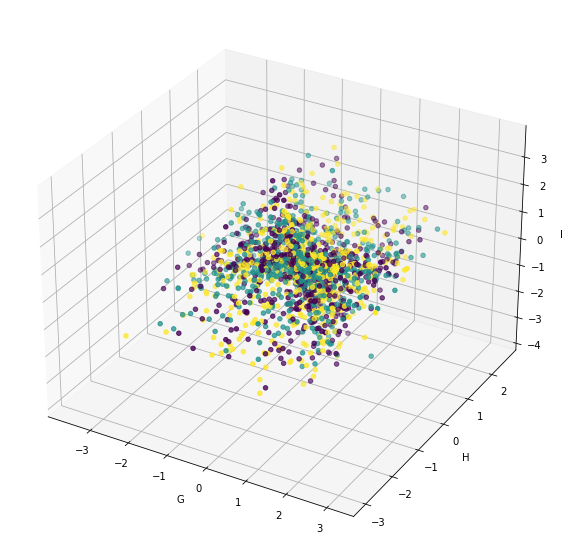

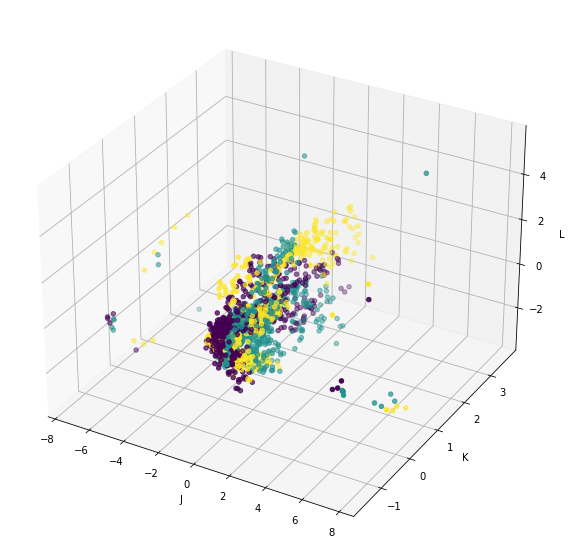

In [29]:
# Actual Classes

plot_3D(lrdf, "A", "B", "C", "P")
plot_3D(lrdf, "D", "E", "F", "P")
plot_3D(lrdf, "G", "H", "I", "P")
plot_3D(lrdf, "J", "K", "L", "P")

#### Model 4: Supervised Learning Classifier with Kernal
- Explain the benefits of using Kernal SVM. 

Kernel SVM especially in this case with a radius based function is great for distinguishing between the classes in this data since there are distinct gaps between each class' respective curved stripe. The support vectors play an important role in guiding the classifier through these gaps to create a near 100% accuracy rate without the need for feature engineering.

The benefits of using kernels in general are that kernel functions are able to operate in high-dimensional, implicit feature spaces without ever computing the coordinates of the data in that space. Instead, it computes the inner products between the images of all pairs of data in the feature space, which tends to be computationally cheaper than explicit coordinate computation. Unlabeled units can then be treated based on a similarity function between it and the training data.

It also is very simple relative to the other models because it performs very well without the need for feature engineering or dimension reduction.


In [30]:
# The benefit of using kernel SVM is that the algorithm kernelizes the data and runs SVM
# - which is very efficient if you think about the work you have done for models 1, 2, and 3.
# The result still needs to be reported.

# Kernel SVM
# Standard formatting
ksvmData = pd.DataFrame(x)
ksvmData.columns = ["Index","X","Y","Class"]

X = np.array(list(zip(ksvmData["X"],ksvmData["Y"])))
y = list(ksvmData["Class"])


In [31]:
# Standard splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Use a radial basis function kernel to better capture the spiraling shape of the data
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

# Getting train and test accuracies
ksvmTrainAccuracy = svm_model.score(X_train, y_train)*100 # accuracy
print("ksvm training accuracy:", ksvmTrainAccuracy)
ksvmTestAccuracy = svm_model.score(X_test, y_test)*100 # accuracy
print("ksvm testing accuracy:", ksvmTestAccuracy)

# Showing confusion matrix
y_predictions = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_predictions)
print(cm)

ksvm training accuracy: 99.75111111111111
ksvm testing accuracy: 99.73333333333333
[[620   0   2]
 [  2 620   0]
 [  0   1 630]]


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


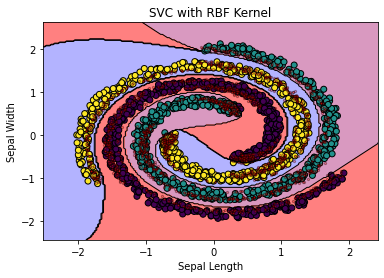

In [33]:
plot_model(svm_model, X_test[:,0], X_test[:,1], y_predictions)
plt.title('SVC with RBF Kernel')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [34]:
Result1 = {'Model Number': [0,1,2,3,4], 
           'Algorithm(s)':['Logistic Regression','KMeans','KNN','Logistic Regression Impr','Kernel SVM'],
           'Number of Features': [2,3,2,12,2],
           'Accuracy':[35,kmeansAccuracy,knnAccuracy,(lrTrainAccuracy+lrTestAccuracy)/2,(ksvmTrainAccuracy+ksvmTestAccuracy)/2]}

Result1 = pd.DataFrame(Result1, columns = ['Model Number', 'Algorithm(s)','Number of Features','Accuracy'])



### Project 1 Starts from here: `CS559_Summer21_Project1_02.csv`
- Do same as above.

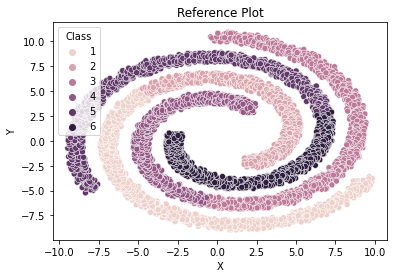

In [35]:
data2 = pd.read_csv('CS559_Summer21_Project1_02.csv', header= None, encoding='ISO-8859-1')
data2.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# use all but the garbage first column of ['NaN', 'var2', 'var2.1', ..., 'Class']
x=data2[1:].to_numpy()
x[:,0] = x[:,0].astype(int)
x[:,1] = x[:,1].astype(float)
x[:,2] = x[:,2].astype(float)
x[:,3] = x[:,3].astype(float)
x[:,4] = x[:,4].astype(float)
x[:,5] = x[:,5].astype(float)
x[:,6] = x[:,6].astype(float)
x[:,7] = x[:,7].astype(float)
x[:,8] = x[:,8].astype(float)
x[:,9] = x[:,9].astype(int)
# Change data from string values to something I can work with

# Reference Plots
df = pd.DataFrame(x)
df.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]
plt.title("Reference Plot")
plot_2D(df,df["X"],df["Y"],df["Class"])

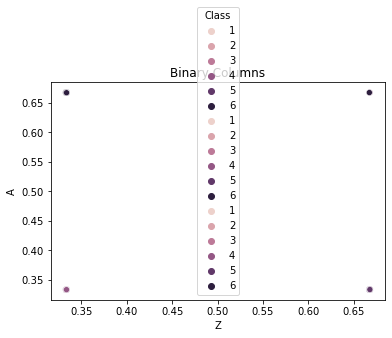

In [36]:
plt.title('Binary Columns')
plot_2D(df,df["Z"],df["A"],df["Class"])
plot_2D(df,df["B"],df["C"],df["Class"])
plot_2D(df,df["D"],df["E"],df["Class"])

(array([[ 383.,  593.,  908., 1061.,  823.,  903., 1172.,  891.,  629.,
          137.],
        [ 351.,  669.,  969., 1008.,  941.,  730., 1171.,  891.,  576.,
          194.]]),
 array([-9.4552, -7.4166799999999995, -5.37816, -3.339640000000001,
        -1.301120000000001, 0.7373999999999992, 2.7759199999999975,
        4.814439999999998, 6.852959999999998, 8.891479999999996, 10.93],
       dtype=object),
 <a list of 2 BarContainer objects>)

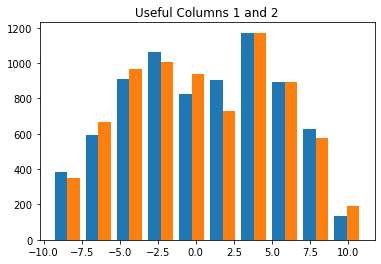

In [37]:
# make histogram of the columns
# still gotta use every column for the data, but can plot only important ones (refer to kmeans)
# Column 0 is the index, so its a list from 0 to 7500
# Columns 1 and 2 have a legitimate range of values and distribution
plt.title("Useful Columns 1 and 2")
plt.hist(x[:,1:3])

(array([[6250.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1250.],
        [6249.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1251.],
        [6250.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1250.],
        [6249.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1251.],
        [6250.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1250.],
        [6249.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1251.]]),
 array([0.333, 0.36650000000000005, 0.4, 0.4335, 0.467, 0.5005000000000001,
        0.534, 0.5675, 0.601, 0.6345000000000001, 0.668], dtype=object),
 <a list of 6 BarContainer objects>)

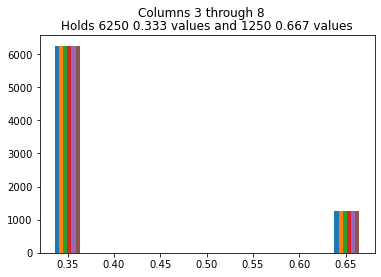

In [38]:
#AKA Airhead Extremes
plt.suptitle("Columns 3 through 8")
plt.title("Holds 6250 0.333 values and 1250 0.667 values")
plt.hist(x[:,3:9])
# Columns 3, 4, 5, 6, 7, and 8 hold roughly 6250 .333 values and 1250 .667 values
# the .333 and .667 values have noise from the 4th digit onwards; they're not totally identical

#### Model 1: Unsupervised Learning Classifier
- Classify using clustering method before and after feature engineering and dimension reduction. 
- Explain the feature enginnering process and the improvement of result when it was done. 
- Explain the role of dimension reduction to the result improvement.  
- Explain the ways to improve the unsupervised learning classifier. 

In [39]:
# KMeans

# We have a lot more features now
kData = pd.DataFrame(x)
kData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# Otherwise still standard procedure of format
X = np.array(list(zip(kData["X"],kData["Y"],kData["Z"],kData["A"],kData["B"],kData["C"],kData["D"],kData["E"])))

# And fit
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(X)
kData["Class"]=kmeans.labels_

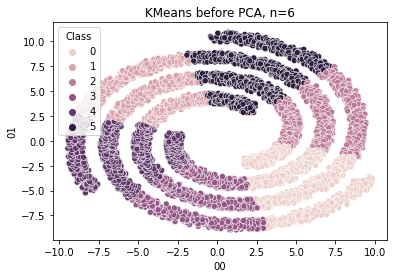

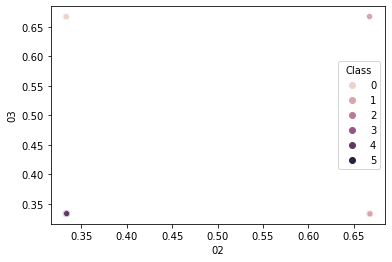

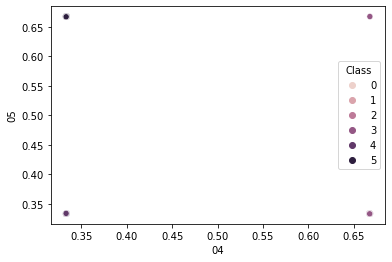

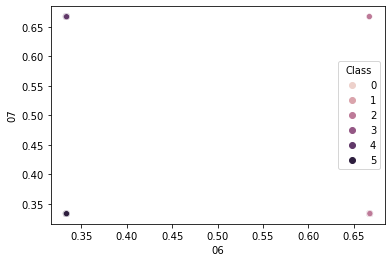

In [40]:
# Plot the excessive number of dimensions
plt.title("KMeans before PCA, n=6")
plot_2D(kmeans, X[:,0], X[:,1], kData["Class"])
plt.xlabel('00')
plt.ylabel('01')
plt.show()
plot_2D(kmeans, X[:,2], X[:,3], kData["Class"])
plt.xlabel('02')
plt.ylabel('03')
plt.show()
plot_2D(kmeans, X[:,4], X[:,5], kData["Class"])
plt.xlabel('04')
plt.ylabel('05')
plt.show()
plot_2D(kmeans, X[:,6], X[:,7], kData["Class"])
plt.xlabel('06')
plt.ylabel('07')
plt.show()

In [41]:
# Accuracy
correct = 0
test = np.array(list(x[:,9]))

#shift from [1,2,3,4,5,6] to [0,1,2,3,4,5] to match predictions' range
test = test - 1

# Create the confusion matrix/tally up the correct classifications
cm = confusion_matrix(test, kData["Class"])
for i in range(len(cm)):
    correct += cm[i][i]
kmeansAccuracy = correct/75
print(kmeansAccuracy)
print(cm)


18.24
[[301 191   0 380 377   0]
 [291 191 383   0   0 386]
 [377   0 382 187   0 303]
 [  0 371   0 196 384 300]
 [  0 379 188   0 298 384]
 [382   0 199 370 300   0]]


In [42]:
# define our dataset to be used in KMeans
kData = pd.DataFrame(x)
kData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# Create a set of transformations to try and separate the different classes
kData["R"] = np.sqrt((kData["X"]**2 + kData["Y"]**2).astype(float)) #R = sqrt(X^2 + Y^2)
kData["theta"] = np.arctan((kData["Y"]/kData["X"]).astype(float))
kData["Rtheta"] = kData["R"]**2+kData["theta"]**2+kData["R"]*kData["theta"]*np.sqrt(2)
kData = kData.sort_values(["R","theta"])

# Get rid of NaN values
kData = kData[1:]

# Best combination I could find
X = np.array(list(zip( 
                      kData["R"], 
                      kData["theta"],
                      kData["Rtheta"]
                      )))


    Explain the feature enginnering process and the improvement of result when it was done.
Similarly to the first half of the project, I used various transformations on the original X and Y values, as well as eliminating the binary classification columns. Since the algorithm is based on centroids and the binary columns all contain extremely similar values, I would be unable to correctly classify based on their values. Using the features shown above, I was able to improve the classification accuracy from 18.24% using the default KMeans algorithm up to 50.81% as shown below. Because of the many classes, I found it very difficult to cleanly separate the classes.

    Explain the role of dimension reduction to the result improvement.
Dimension reduction was used here to reduce clutter and unusable columns for this algorithm, resulting in less complexity and a faster execution time. Using PCA in combination with the columns used from feature engineering helped to improve the accuracy as mentioned above.

    Explain the ways to improve the unsupervised learning classifier.
There may have been a way to use the binary columns more effectively in order to classify the data, but it would be very specific to this dataset and may be subject to overfitting.

As stated above, KMeans particularly is not a very suitable classifier for this dataset, as this data is not based on global proximity. Since KMeans creates centroids and clusters the entire dataset based on which centroid the datapoint is closest to, it tends to create global divisions that is not suitable for a dataset like this, where local proximity is greatly preferred. The usage of feature engineering could be optimized as I did not perfectly separate the different classes, but other algorithms more based on local proximity could be used as well to perform the task more effectively and efficiently.

In [43]:
# Remove all the features Z, A, B, C, D, and E

#Use PCA to optimize dimensions
pca = PCA(n_components=3,random_state=0)
X = pca.fit_transform(X)
#strongly resembles plot of columns 0 and 1

#Use KMeans after feature engineering/dimension reduction
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(X)
kData["Class"]=kmeans.labels_

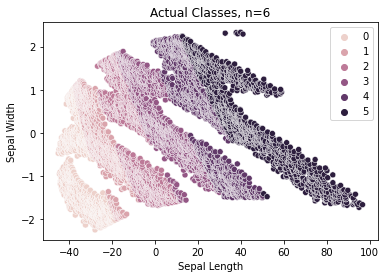

In [44]:
test = np.array(list(x[1:,9]))
#shift from [1,2,3] to [0,1,2] to match predictions' range
test = test - 1

plot_2D(kmeans,X[:,0], X[:,1], test)
plt.title('Actual Classes, n=6')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

50.81333333333333
[[1063    0  185    0    0    0]
 [ 697    0  552    2    0    0]
 [   1    0  707  526   15    0]
 [   0    0  211  680  356    4]
 [   0    0    0  178  692  379]
 [   0  363    0    0  219  669]]


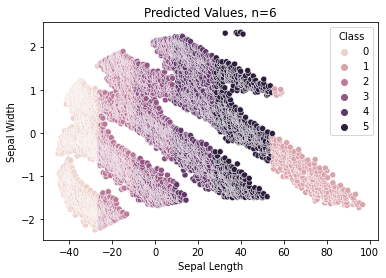

In [45]:
# Accuracy
test = np.array(list(x[1:,9]))

#shift from [1,2,3] to [0,1,2] to match predictions' range
test = test - 1

# Swap around classes to better fit the order from the actual classes
kData[kData["Class"] == 4] = 10
kData[kData["Class"] == 1] = 4
kData[kData["Class"] == 3] = 1
kData[kData["Class"] == 10] = 3

kData[kData["Class"] == 2] = 9
kData[kData["Class"] == 0] = 2
kData[kData["Class"] == 5] = 0
kData[kData["Class"] == 9] = 5

# Create the confusion matrix
cm = confusion_matrix(test, kData["Class"])
correct = 0
for i in range(len(cm)):
    correct += cm[i][i]
    
# Tally up the accuracy and print
kmeansAccuracy = correct/75
print(kmeansAccuracy)
print(cm)

# Plot the data as well
plot_2D(kmeans,X[:,0], X[:,1], kData["Class"])
plt.title('Predicted Values, n=6')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


#### Model 2: Non-parametric Supervised Learning Classifier
- Use both KNN and linear SVM with a raw dataset (no feature engineering). 
- For KNN, determine the limit of K value by testing various K value. Justify the threshold K value. 
- For linear SVM, explain the failure of using linear SVM. 

In [46]:
#KNN

# Grab the data
knnData = pd.DataFrame(x)
knnData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# Organize into array-type
X = list(zip(knnData["X"],knnData["Y"],knnData["Z"],knnData["A"],knnData["B"],knnData["C"],knnData["D"],knnData["E"]))
y = list(knnData["Class"])

# Scale
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
# Gather accuracies for varying k values
kList =[]
for i in range(1,7500,250):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X,y)

    # Yields accurate results while k is low because of the binary columns representing classes
    y_predictions = neigh.predict(X)
    
    cm = confusion_matrix(y, y_predictions)
    correct = 0
    for i in range(len(cm)):
        correct += cm[i][i]
    kList.append(correct)

[[   1 7500]
 [ 251 7498]
 [ 501 7499]
 [ 751 7500]
 [1001 7500]
 [1251 7500]
 [1501 7500]
 [1751 7500]
 [2001 7500]
 [2251 7500]
 [2501 7500]
 [2751 7500]
 [3001 7500]
 [3251 7500]
 [3501 7500]
 [3751 7500]
 [4001 7500]
 [4251 7420]
 [4501 6737]
 [4751 6094]
 [5001 5341]
 [5251 4510]
 [5501 4082]
 [5751 3864]
 [6001 3753]
 [6251 3753]
 [6501 3753]
 [6751 3753]
 [7001 3741]
 [7251 3173]]


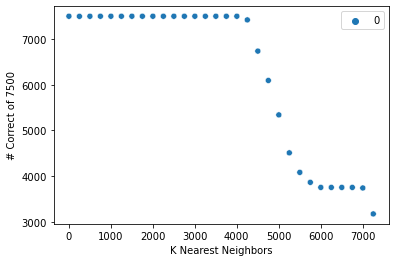

In [48]:
# Show findings
yields = np.array(list(zip(range(1,7500,250),kList)))
print(yields)

# And plot
df = pd.DataFrame(yields)
df.columns = ["K Nearest Neighbors","# Correct of 7500"]
plot_2D(df,"K Nearest Neighbors","# Correct of 7500",0)
#binaries are playing the role

As shown by the graph above, the accuracy rate remains about perfect up through knn=4000, then it steeply drops until just before 6000 where it levels out again. The perfect accuracy for so long is likely due to the many columns Z, A, B, C, D, and E that are acting as binary data representing each class. These columns contain very tightly packed data points, and so the classes can stay within their corresponding groupings even when tallying a very large proportion of the dataset. The accuracy falls steeply after 4000 because the proportion of the dataset tallied starts to count more data points from opposing classes than from its own, which results in strange plots on the X and Y axis especially at k=5000 as seen below.

In [49]:
kList2 =[]
# Find the threshold k value
for i in range(4187,4193,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X,y)

    # Yields accurate results while k is within binary classifications, drops when view sees other binary classes
    y_predictions = neigh.predict(X)
    
    cm = confusion_matrix(y, y_predictions)
    correct = 0
    for i in range(len(cm)):
        correct += cm[i][i]
    kList2.append(correct)

[[4187 7500]
 [4188 7500]
 [4189 7500]
 [4190 7499]
 [4191 7499]
 [4192 7499]]


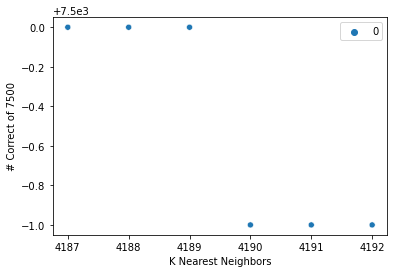

In [50]:
# Show findings
yields = np.array(list(zip(range(4187,4193,1),kList2)))
print(yields)

# And plot
df = pd.DataFrame(yields)
df.columns = ["K Nearest Neighbors","# Correct of 7500"]
plot_2D(df,"K Nearest Neighbors","# Correct of 7500",0)

As shown by the graph above, the exact threshold value for perfect KNN performance is with knn = 4189. After this point, a single data point gets consistently misclassified, and as I include more neighbors, the performance significantly drops as seen in the first, larger view chart of these axes.

100.0


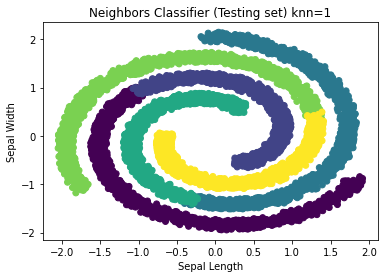

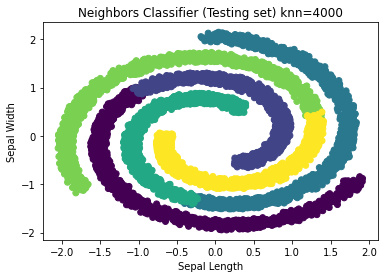

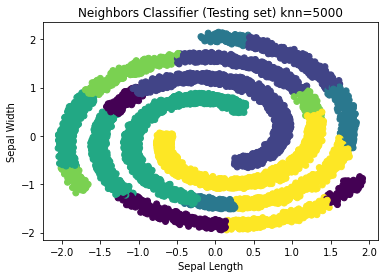

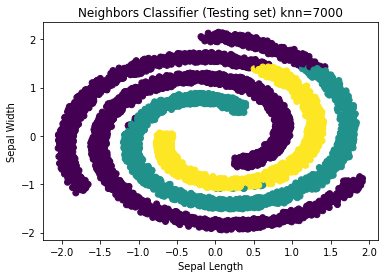

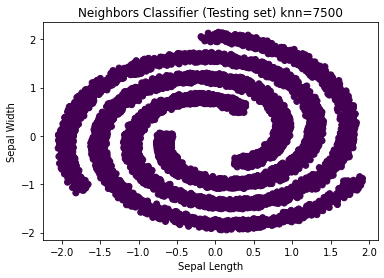

In [51]:
# Plot KNN with various k's, demonstrate the different classifications
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

knnAccuracy = neigh.score(X,y)*100
print(knnAccuracy)

# plot_model is running into issues due to X's dimensions, but scatter works well
plt.scatter(X[:,0],X[:,1],c=y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=1')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=4000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=4000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=5000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=5000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=7000)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=7000')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

neigh = KNeighborsClassifier(n_neighbors=7500)
neigh.fit(X,y)
y_predictions = neigh.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_predictions)
plt.title('Neighbors Classifier (Testing set) knn=7500')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

The plots above specifically for knn=1 and knn=4000 are identical due to the usage of the binary classes when identifying which class each data point should be assigned to. This also explains why for knn=5000, the graph shows segmented, separated clusters of classes where knn typically tends to have very connected clusters. The binary classes had a great deal in influencing where each datapoint was assigned to. The plot is still overrun at knn=7500 as the largest initial class takes over the entire dataset.

In [52]:
#linear SVM
svmData = pd.DataFrame(x)
svmData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# Organize data
X = np.array(list(zip(svmData["X"],svmData["Y"])))
y = list(svmData["Class"])

In [53]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# Create linear SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

# Gather accuracies
svmTrainAccuracy = svm_model.score(X_train, y_train)*100 # accuracy
print("svm training accuracy:", svmTrainAccuracy)
svmTestAccuracy = svm_model.score(X_test, y_test)*100 # accuracy
print("svm testing accuracy:",svmTestAccuracy)

# And confusion matrix
y_predictions = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_predictions)
print(cm)

svm training accuracy: 42.20444444444445
svm testing accuracy: 41.44
[[153   0  36  40  43  40]
 [  0 116  60   0  83  51]
 [ 51  25 152   0  39  45]
 [ 79  62   0 110  59   0]
 [ 41  46  53  21 154   0]
 [ 82   0  92  50   0  92]]


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


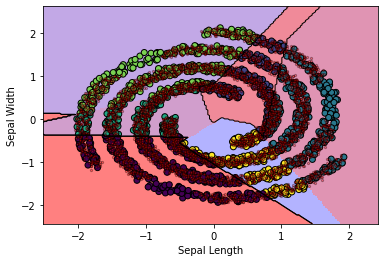

In [55]:
# And plot
plot_model(svm_model, X_test[:,0], X_test[:,1], y_predictions)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Linear SVC is still only ble to divide the distributions linearly, resulting in the low accuracy rate for the spiraling dataset. However, each division is able to capture a solid portion of its correct class since each class is now only half the length of the stripe, yielding an overall accuracy of roughly 42%.

#### Model 3: Probabilitic Supervised Learning Classifier
- Simple logistic regression is already done and resulted the accruacy value of 35%. 
- Improve the model and explain the workflow. 

In [56]:
#The 35% accuracy is the result of logistic regression used without any feature engineering or dimension reduction. 
#For model 3, you can do such work to improve the classification using logistic regression.

# Logistic Regression
# Similar formatting of data
lrData = pd.DataFrame(x)
lrData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

#Create a vast set of transformations to use
lrData["X2"] = lrData["X"]**2 #X^2
lrData["XY"] = lrData["X"]*lrData["Y"] #X*Y
lrData["2XY"] = (2**(1/2))*lrData["X"]*lrData["Y"] #sqrt(2)*X*Y
lrData["Y2"] = lrData["Y"]**2 #Y^2
lrData["X2Y2XY"] = lrData["X2"]+lrData["Y2"]+lrData["XY"]
lrData["R"] = np.sqrt((lrData["X"]**2 + lrData["Y"]**2).astype(float)) #R = sqrt(X^2 + Y^2)
lrData["theta"] = np.arctan((lrData["Y"]/lrData["X"]).astype(float))
lrData["Rtheta"] = lrData["R"]**2+lrData["theta"]**2+lrData["R"]*lrData["theta"]*np.sqrt(2)
lrData["Xdif"] = lrData["X"].diff()
lrData["Ydif"] = lrData["Y"].diff()
lrData["Rdif"] = lrData["R"].diff()
lrData["thetadif"] = lrData["theta"].diff()
lrData = lrData[1:]


# Using all of the features worked out to provide an excellent accuracy
X = np.array(list(zip(lrData["X"], 
                      lrData["Y"], 
                      lrData["X2"],
                      lrData["XY"],
                      lrData["2XY"],
                      lrData["Y2"],
                      lrData["X2Y2XY"], 
                      lrData["R"], 
                      lrData["theta"],
                      lrData["Rtheta"],
                      lrData["Xdif"], 
                      lrData["Ydif"], 
                      lrData["Rdif"], 
                      lrData["thetadif"]
                      )))

#R^2 = X^2 + Y^2
# angle term = arctan(y/x)
# X = np.array(list(zip(lrData["X"],lrData["Y"])))
y = list(lrData["Class"])


In [57]:
# Reduce the dimensions from 14 to 12, not super significant but dimension reduction nonetheless
pca = PCA(n_components=12,random_state=0)
X = pca.fit_transform(X)

In [58]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# And scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Fit the data
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

# And grab the accuracies
lrTrainAccuracy = lr.score(X_train, y_train)*100 # accuracy
print("lr training accuracy:", lrTrainAccuracy)
lrTestAccuracy = lr.score(X_test, y_test)*100 # accuracy
print("lr testing accuracy:", lrTestAccuracy)

# Create the confusion matrix
y_predictions = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predictions)
print(cm)

lr training accuracy: 95.16358463726885
lr testing accuracy: 94.39999999999999
[[294   0   9   2   7   0]
 [  6 303   0   0   0   1]
 [ 15   0 294   1   2   0]
 [  5  20   0 285   0   0]
 [ 10   4  11   0 290   0]
 [  0   0   3   9   0 304]]


C:\Users\aughb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


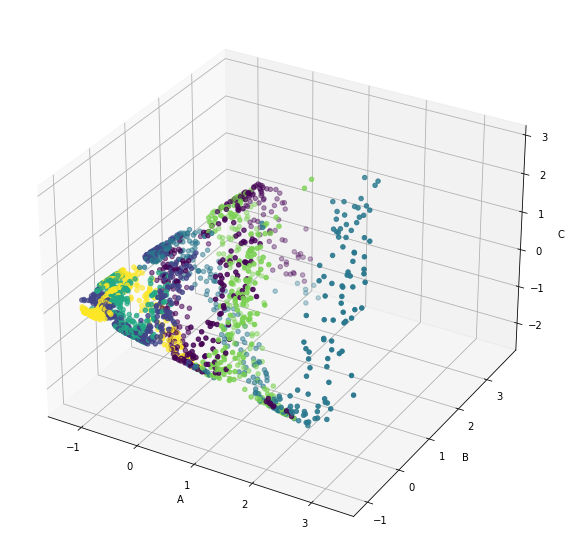

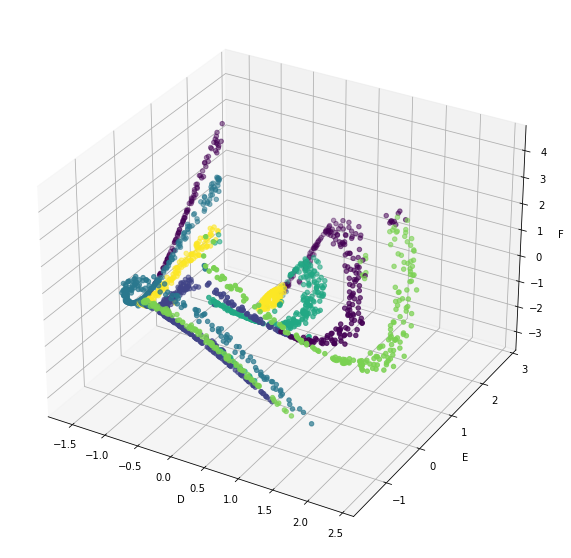

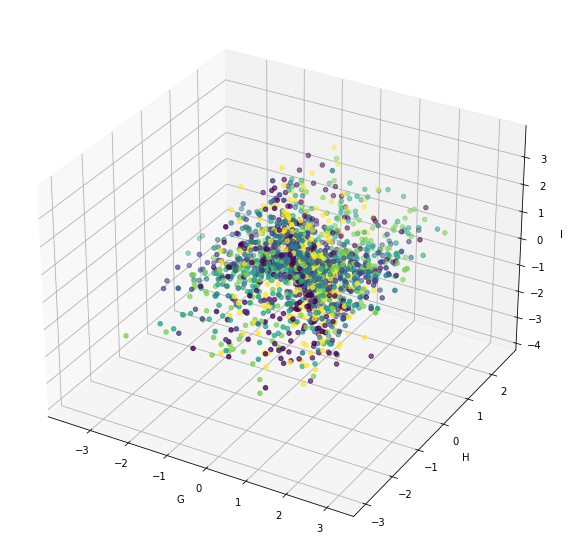

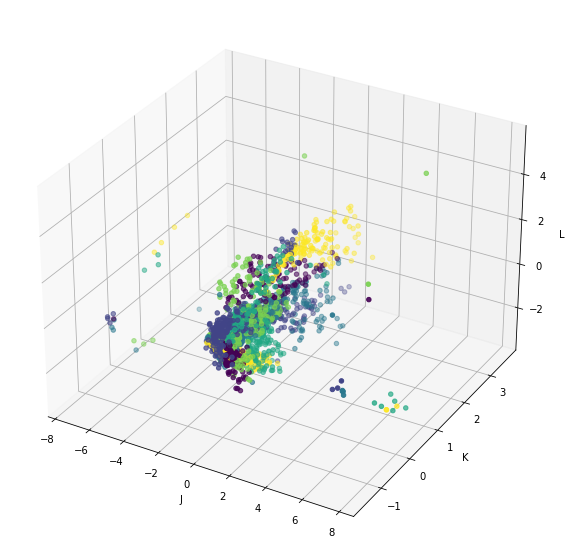

In [60]:
# Plot the data
lrdf = pd.DataFrame(X_test)
lrdf.columns = ["A","B","C","D","E","F","G","H","I","J","K","L"]
lrdf["O"] = y_predictions
lrdf["P"] = y_test

# Predicted Classes
plot_3D(lrdf, "A", "B", "C", "O")
plot_3D(lrdf, "D", "E", "F", "O")
plot_3D(lrdf, "G", "H", "I", "O")
plot_3D(lrdf, "J", "K", "L", "O")

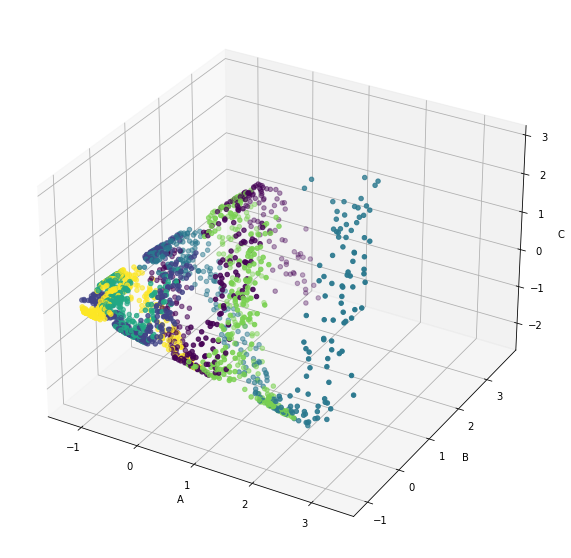

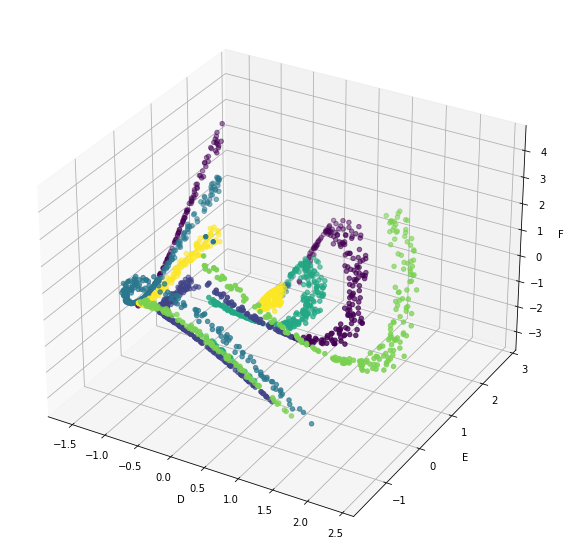

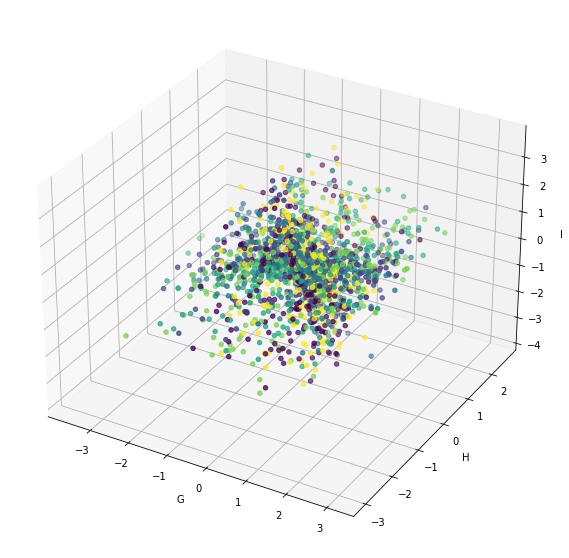

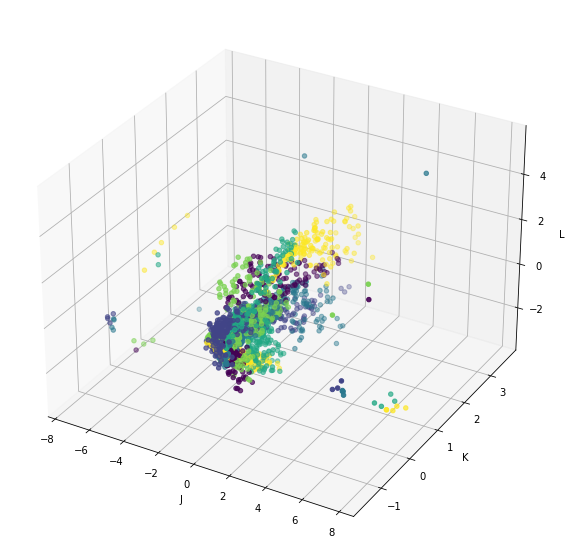

In [61]:
# Actual Classes
plot_3D(lrdf, "A", "B", "C", "P")
plot_3D(lrdf, "D", "E", "F", "P")
plot_3D(lrdf, "G", "H", "I", "P")
plot_3D(lrdf, "J", "K", "L", "P")

#### Model 4: Supervised Learning Classifier with Kernal
- Explain the benefits of using Kernal SVM. 

(From above) Kernel SVM especially in this case with a radius based function is great for distinguishing between the classes in this data since there are distinct gaps between each class' respective curved stripe. The support vectors play an important role in guiding the classifier through these gaps to create a near 100% accuracy rate without the need for feature engineering. 

(New) There is an added concentration of support vectors halfway between the stripes to highlight the division of classes that successfully maintains the near 100% accuracy.

(From above) The benefits of using kernels in general are that kernel functions are able to operate in high-dimensional, implicit feature spaces without ever computing the coordinates of the data in that space. Instead, it computes the inner products between the images of all pairs of data in the feature space, which tends to be computationally cheaper than explicit coordinate computation. Unlabeled units can then be treated based on a similarity function between it and the training data.

In [62]:
# The benefit of using kernel SVM is that the algorithm kernelizes the data and runs SVM
# - which is very efficient if you think about the work you have done for models 1, 2, and 3.
# The result still needs to be reported.
# Kernel SVM
svmData = pd.DataFrame(x)
svmData.columns = ["Index","X","Y","Z","A","B","C","D","E","Class"]

# Organize
X = np.array(list(zip(svmData["X"],svmData["Y"])))
y = list(svmData["Class"])

In [63]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [64]:
# Fit the data
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

# Find the accuracies
ksvmTrainAccuracy = svm_model.score(X_train, y_train)*100 # accuracy
print("ksvm training accuracy:", ksvmTrainAccuracy)
ksvmTestAccuracy = svm_model.score(X_test, y_test)*100 # accuracy
print("ksvm testing accuracy:", ksvmTestAccuracy)

# Create the confusion matrix
y_predictions = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_predictions)
print(cm)

ksvm training accuracy: 99.28888888888889
ksvm testing accuracy: 99.52
[[312   0   0   0   0   0]
 [  6 304   0   0   0   0]
 [  0   0 311   1   0   0]
 [  0   0   0 310   0   0]
 [  0   0   0   0 313   2]
 [  0   0   0   0   0 316]]


<ipython-input-3-bc893237f863>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
<ipython-input-3-bc893237f863>:32: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')


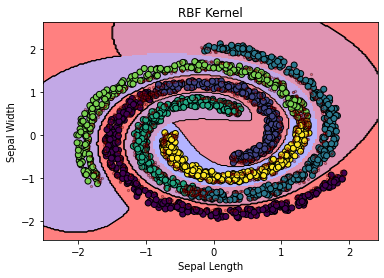

In [65]:
# Plot the data
plot_model(svm_model, X_test[:,0], X_test[:,1], y_predictions)
plt.title('RBF Kernel')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [66]:
Result2 = {'Model Number': [0,1,2,3,4], 
           'Algorithm(s)':['Logistic Regression','KMeans','KNN','Logistic Regression Impr','Kernel SVM'],
           'Number of Features': [2,3,8,12,2],
           'Accuracy':[35,kmeansAccuracy,knnAccuracy,(lrTrainAccuracy+lrTestAccuracy)/2,(ksvmTrainAccuracy+ksvmTestAccuracy)/2]}

Result2 = pd.DataFrame(Result2, columns = ['Model Number', 'Algorithm(s)','Number of Features','Accuracy'])

#### Conclusion:

Summarize your work and result. 

In [67]:
print(Result1)
print(Result2)

   Model Number              Algorithm(s)  Number of Features    Accuracy
0             0       Logistic Regression                   2   35.000000
1             1                    KMeans                   3   63.253333
2             2                       KNN                   2  100.000000
3             3  Logistic Regression Impr                  12   51.586833
4             4                Kernel SVM                   2   99.742222
   Model Number              Algorithm(s)  Number of Features    Accuracy
0             0       Logistic Regression                   2   35.000000
1             1                    KMeans                   3   50.813333
2             2                       KNN                   8  100.000000
3             3  Logistic Regression Impr                  12   94.781792
4             4                Kernel SVM                   2   99.404444


Firstly, I only showed KNN from model 2 instead of both KNN and SVM because KNN greatly outperformed KNN in this section, and the directions state to only show the best result from each model. That being said, KNN greatly outperformed all the other algorithms in this project with the exception of RBFKernel SVM. The only reason KNN has 9 features in Result 2 is because I used it on the raw dataset. 

The biggest reason KNN performed so well is because the dataset provided is very defined as favoring local-proximity based algorithms. This means classifying a data point based on the data points nearest to it. The data, or at least the X and Y columns for the second half, shows three distinct, curved stripes representing three different classes. In the second half, these stripes were also cut in half at the middle to create six classes. This means, at low k-values, the nearest data points were all within the same stripe and thus were solidly and accuractely classified without ambiguity.

RBFKernel SVM was also able to capitalize and the properties of the dataset because it was able to use support vectors to guide dividing walls between the stripes, and at the middle of each stripe in the second dataset. Had there been mixed classes within each stripe, this algorithm would have struggled a lot more to create a clear wall without heavily overfitting. It had a near perfect accuracy as well without any need for feature engineering.

For these reasons, global-proximity based algorithms such as KMeans, linear SVM, Logistic Regression struggled because their classifications could not handle the curved nature of the stripes. Although the stripes were distinct locally, any line made to try to classify them was forced to cut through all three regardless of its slope due to the spiral shape. This meant any form of classification would spill between stripes and result in many data points getting misclassified. This was mitigated with varying degrees of success through feature engineering and dimension reduction. 